Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits16 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


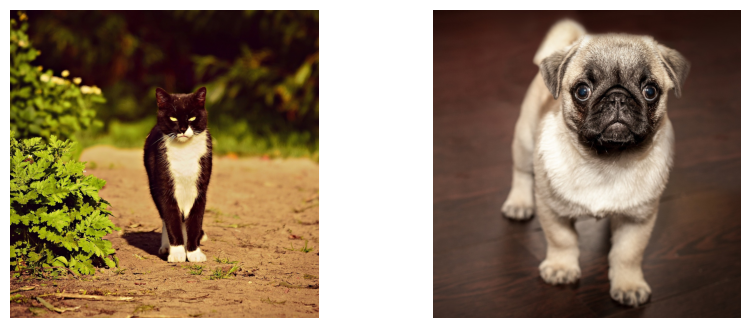

Cosine similarity (cat vs dog): 0.1965


In [20]:
import torch
from transformers import ViTFeatureExtractor, ViTModel
from skimage.io import imreadù
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

# 1. Carica modello DINO da Hugging Face
model_name = "facebook/dino-vits16"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTModel.from_pretrained(model_name)
model.eval()

# 2. Carica immagini con skimage
img1_np = imread("../img/cat2.jpg") #cat2.jpg, dog2.jpg"
img2_np = imread("../img/dog1.jpg")

# 3. Visualizza immagini
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1_np)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img2_np)
plt.axis("off")
plt.show()

# 4. Preprocessing (usa feature_extractor su NumPy images)
inputs = feature_extractor(images=[img1_np, img2_np], return_tensors="pt")

# 5. Estrai embedding (CLS token)
with torch.no_grad():
    outputs = model(**inputs)
    cls_embeddings = outputs.last_hidden_state[:, 0]  # [batch_size, hidden_dim]

# 6. Calcola similarità coseno tra le due immagini
sim = F.cosine_similarity(cls_embeddings[0], cls_embeddings[1], dim=0).item()
print(f"Cosine similarity (cat vs dog): {sim:.4f}")
